In [106]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os

In [107]:
url = os.getcwd().replace('\\','/')+'/'+'Perceptron/mushroom.txt'
with open(url) as a:
    data = np.array([x.split(',') for x in a.read().split('\n')])

In [108]:
le = preprocessing.LabelEncoder()
column = data[:,0]
set_col = list(set(column))
le.fit(column)
y = le.transform(column)

In [109]:
X = np.array([])
for n in range(1,data.shape[1]):
    col = data[:,n]
    set_col = set(col)
    matrix = np.eye(len(set(col)))
    X_1 = np.array([matrix[list(set_col).index(i)] for i in col])
    if X.shape == (0,):
        X = X_1
    else:
        X =np.hstack((X,X_1))  

In [110]:
class Perceptron:
    def __init__(self,eta = 0.1, epochs = 10, random_seed=3):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    def fit(self, X, y ,X0= False):
        if X0 == False:
            X = np.c_[np.ones(len(y)), X]
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1])
        
        self.maxy,self.miny = y.max(),y.min()
        self.cost_=[] #인스턴스 변수로 사용하려면 self.을 붙여야 한다. 변수를 리스트로 초기화.
        self.w_=np.array([self.w]) #self.w_는 변화된 w를 또 하나의 벡터로 변환해서 w의 변화를 보는 것.
        
        for i in range(self.epochs):
            self.errors = 0
            for xi,yi in zip(X,y):
                yhat = self.activate(xi)
                delta = self.eta*(yi-yhat)*xi
                self.w = self.w +delta
                if yi!=yhat:
                    self.errors += 1
            self.cost_.append(self.errors)
            self.w_ = np.vstack([self.w_,self.w]) #w_에 w 추가.
        return self.errors
    
    def net_input(self,X):
        if X.shape[0] == self.w.shape[0]: #편향값이 1이 아닌 경우를 검사하기 위해
            z = np.dot(self.w.T, X)
        else:
            z = np.dot(X, self.w[1:])+self.w[0]
        return z
    
    def activate(self,X):
        mid = (self.maxy + self.miny)/2
        return np.where(self.net_input(X)>mid, self.maxy, self.miny)
    
    def predict(self,X):
        return self.activate(X) #이미 계산된 가중치로 새로운 입력 특성에 대해 예측하는 함수. 
                

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Wall time: 3.86 s


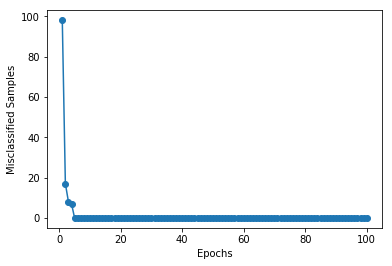

In [112]:
%%time
ppn = Perceptron(eta = 0.1, epochs=100)
ppn.fit(X_train,y_train)
plt.plot(range(1,len(ppn.cost_)+1),ppn.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')
plt.savefig('Epochs',dpi = 150)

In [114]:
np.mean(ppn.predict(X_test) == y_test)

1.0